In [16]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Dropout
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files

In [ ]:
# Cargar el dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [7]:
print("Forma de los datos de entrenamiento:", x_train.shape)
print("Forma de las etiquetas de entrenamiento:", y_train.shape)
print("Forma de los datos de prueba:", x_test.shape)
print("Forma de las etiquetas de prueba:", y_test.shape)

Forma de los datos de entrenamiento: (60000, 28, 28)
Forma de las etiquetas de entrenamiento: (60000, 10)
Forma de los datos de prueba: (10000, 28, 28)
Forma de las etiquetas de prueba: (10000, 10)


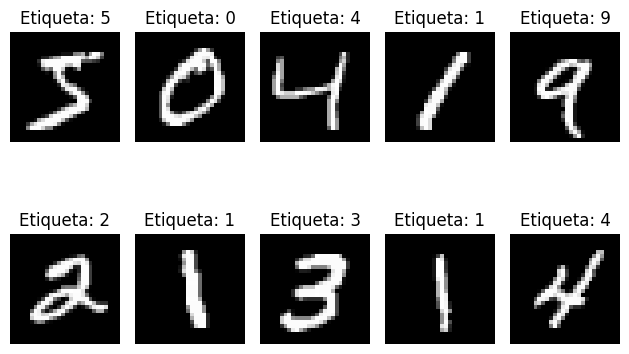

In [10]:
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Etiqueta: {y_train[i].argmax()}")
    plt.axis('off')
plt.tight_layout()
plt.show()

In [12]:
unique, counts = np.unique(y_train.argmax(axis=1), return_counts=True)
print("Distribución de las clases:")
for digit, count in zip(unique, counts):
    print(f"Dígito {digit}: {count} ejemplos")

Distribución de las clases:
Dígito 0: 5923 ejemplos
Dígito 1: 6742 ejemplos
Dígito 2: 5958 ejemplos
Dígito 3: 6131 ejemplos
Dígito 4: 5842 ejemplos
Dígito 5: 5421 ejemplos
Dígito 6: 5918 ejemplos
Dígito 7: 6265 ejemplos
Dígito 8: 5851 ejemplos
Dígito 9: 5949 ejemplos


In [3]:

# Normalizar los datos
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Convertir las etiquetas a formato categórico
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Aplanar la imagen de 28x28 píxeles
    Dense(128, activation='relu'),  # Capa completamente conectada
    Dropout(0.2),                   # Regularización para prevenir overfitting
    Dense(10, activation='softmax') # Salida con 10 clases (dígitos)
])
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.8462 - loss: 0.5307 - val_accuracy: 0.9567 - val_loss: 0.1542
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9483 - loss: 0.1695 - val_accuracy: 0.9650 - val_loss: 0.1158
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9639 - loss: 0.1217 - val_accuracy: 0.9704 - val_loss: 0.0985
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9700 - loss: 0.0962 - val_accuracy: 0.9722 - val_loss: 0.0940
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9748 - loss: 0.0798 - val_accuracy: 0.9730 - val_loss: 0.0921
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9785 - loss: 0.0668 - val_accuracy: 0.9758 - val_loss: 0.0845
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9805 - loss: 0.0597 - val_accuracy: 0.9751 - val_loss: 0.0872
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9836 - loss: 0.0532 

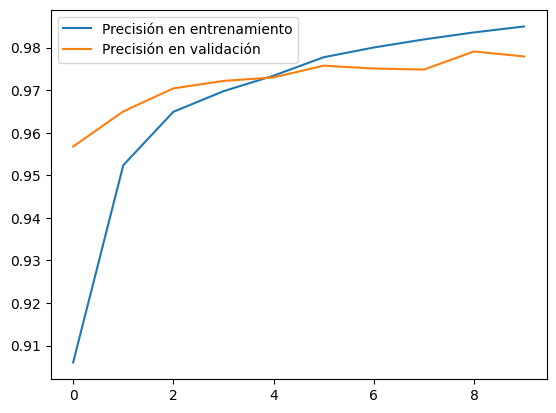

In [14]:

# Gráfica de precisión
plt.plot(history.history['accuracy'], label='Precisión en entrenamiento')
plt.plot(history.history['val_accuracy'], label='Precisión en validación')
plt.legend()
plt.show()

# Gráfica de pérdida

In [18]:
model.save("numeros_mnist.h5")

# Descargar el modelo
files.download("numeros_mnist.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>